In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [4]:
data=pd.read_csv(r"Z:\226518_Purva\SEM_2\ML\USA_Housing.csv")
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [5]:
data.head()

<bound method NDFrame.head of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0           

In [6]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
data.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

### heatmap showing the correlation coefficients between all pairs of features in the dataset.

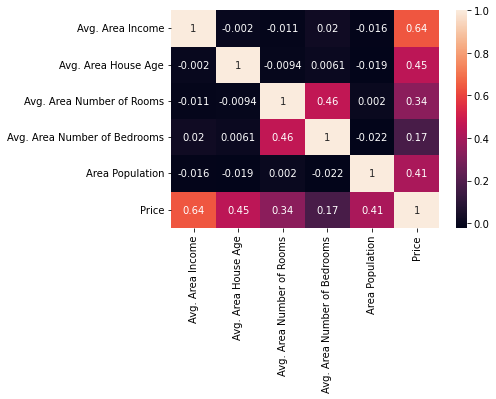

In [11]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot=True);

### Preprocess the data

In [12]:
data.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# Linear Regression

# X= Independent variable='Avg. Area Income '

# Y=Target variable \ Dependent variable ='Price'


In [13]:
x = data.iloc[: ,0:1].values
x

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]])

In [14]:
y=data.iloc[:,5:6].values
y

array([[1059033.55787012],
       [1505890.91484695],
       [1058987.98787608],
       ...,
       [1030729.58315229],
       [1198656.87240769],
       [1298950.48026696]])

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
#Implement classifier based on Simple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
predictions = model.predict(x_test)  # x test varun y test value predict keli
predictions

array([[1085358.91824005],
       [ 983853.71225827],
       [1262464.24172376],
       ...,
       [1122942.92094224],
       [ 960627.03940555],
       [1189412.71698593]])

In [18]:
y_test

array([[1339096.07724513],
       [1251794.17883686],
       [1340094.96620542],
       ...,
       [1472887.24706053],
       [1409762.1194903 ],
       [1009606.28363319]])

<AxesSubplot:ylabel='Density'>

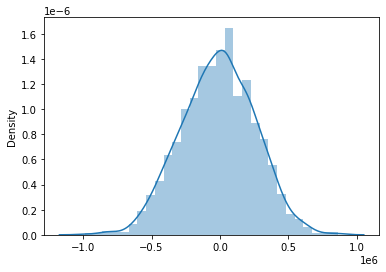

In [19]:
import seaborn as sns
sns.distplot(predictions-y_test)

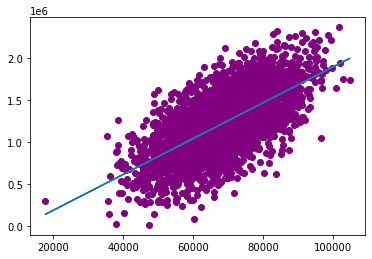

In [22]:
#Plotting the Best-fit Linear Regression Graph
plt.scatter(x_train, y_train, color='purple')
plt.plot(x_train, model.predict(x_train))

In [27]:
# Accuracy
model.score(x_train,y_train)

0.41517344376086807

In [28]:
from sklearn import metrics

In [29]:
metrics.mean_absolute_error(y_test,predictions)

214070.0765807124

In [26]:
metrics.mean_squared_error(y_test,predictions)

71606719101.03638

In [30]:
# Root Mean squared error
np.sqrt(metrics.mean_squared_error(y_test,predictions))

267594.31814042013

In [31]:
# r2 squared
from sklearn.metrics import r2_score

In [32]:
# error matrix
r2_score(y_test,predictions)

0.39321648659430386

# Multiple Regression

# Target variable \ Dependent variable ='Price'

# Independent variable=Avg. Area Income,Avg. Area House Age,Area Population

In [33]:
x=data[['Avg. Area Income','Avg. Area House Age','Area Population']]
x

,Avg. Area Income,Avg. Area House Age,Area Population
0,79545.458574,5.682861,23086.800503
1,79248.642455,6.002900,40173.072174
2,61287.067179,5.865890,36882.159400
3,63345.240046,7.188236,34310.242831
4,59982.197226,5.040555,26354.109472
...,...,...,...
4995,60567.944140,7.830362,22837.361035
4996,78491.275435,6.999135,25616.115489
4997,63390.686886,7.250591,33266.145490
4998,68001.331235,5.534388,42625.620156


In [34]:
y=data['Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
#Implement classifier based on Multiple regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [37]:
predictions = model.predict(x_test)  # x test varun y test value predict keli
predictions

array([1373088.49178339, 1244916.2342594 , 1285455.50871436,
       1121781.17819841, 1127620.66135206, 1479196.29605811,
        922947.95949667,  963485.58583105,  880128.84070255,
       1493389.77508039,  745348.50975573, 1625245.57382645,
       1029455.23616514, 1483823.51483058, 1209131.6991227 ,
       1059090.10960688, 1510655.43702494, 1090731.69699633,
        846141.14943254, 1034703.59961434, 1268098.08598637,
       1196338.47466039, 1675284.74618641, 1336467.258261  ,
       1559620.29300659, 1087222.85694053, 1104094.56692888,
       1028828.74627719,  871515.23184159, 1688116.11551614,
       1318633.32755853, 1540280.39108594, 1240597.42934604,
       1084517.11652476, 1495874.1229964 , 1706073.19418753,
       1397987.97328448,  747138.57388794, 1617046.09119019,
       1235892.34322795, 1628921.05260292,  987584.2326885 ,
       1215110.55337737,  904793.76121302, 1176675.20733778,
       1096280.0355695 , 1267064.67824468, 1536590.18292519,
       1537162.93475127,

In [38]:
y_test

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
4711    1.107031e+06
2313    1.405505e+06
3214    1.924156e+06
2732    1.571254e+06
1926    8.831475e+05
Name: Price, Length: 1000, dtype: float64

In [39]:
# Accuracy
model.score(x_train,y_train)


0.7987005582223338

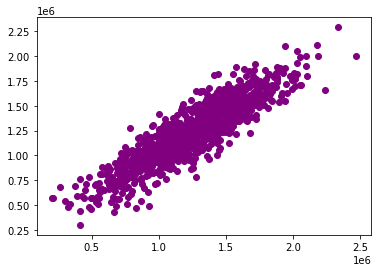

In [40]:
#Plotting the Best-fit Linear Regression Graph
plt.scatter(y_test,predictions, color='purple')


<AxesSubplot:xlabel='Price', ylabel='Density'>

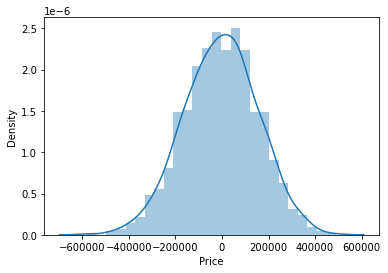

In [41]:
import seaborn as sns
sns.distplot(predictions-y_test)

In [42]:
metrics.mean_absolute_error(y_test,predictions)


126906.14302163819

In [43]:
metrics.mean_squared_error(y_test,predictions)

25217178477.03668

In [44]:
# Root Mean squared error
np.sqrt(metrics.mean_squared_error(y_test,predictions))

158799.17656284204

In [45]:
# Error matrix
r2_score(y_test,predictions)

0.7950363687032574